# **CSE 5717 Final Project - Team 1 - VGG16**
---
# **Yousif Said, John Hudson, Tirth Patel, Adarsh Makarla**



# **VGG16 Model**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
!unzip "/content/drive/MyDrive/archive.zip";

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [3]:
# open the asl_alphabet_train folder that contains folders of images of each letter
os.chdir('/content/asl_alphabet_train/asl_alphabet_train')
data_path = '/content/asl_alphabet_train/asl_alphabet_train'

In [4]:
import numpy as np
import pandas as pd
import string

chars = [] # initialize list to contain all labels (characters and special characters)

upper_chars = list(string.ascii_uppercase) # list with all uppercase english alphabet letters

special_chars = ["del", "nothing", "space"] # list of special labels


chars = upper_chars + special_chars
print(chars)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


# **Display Some of the Data**

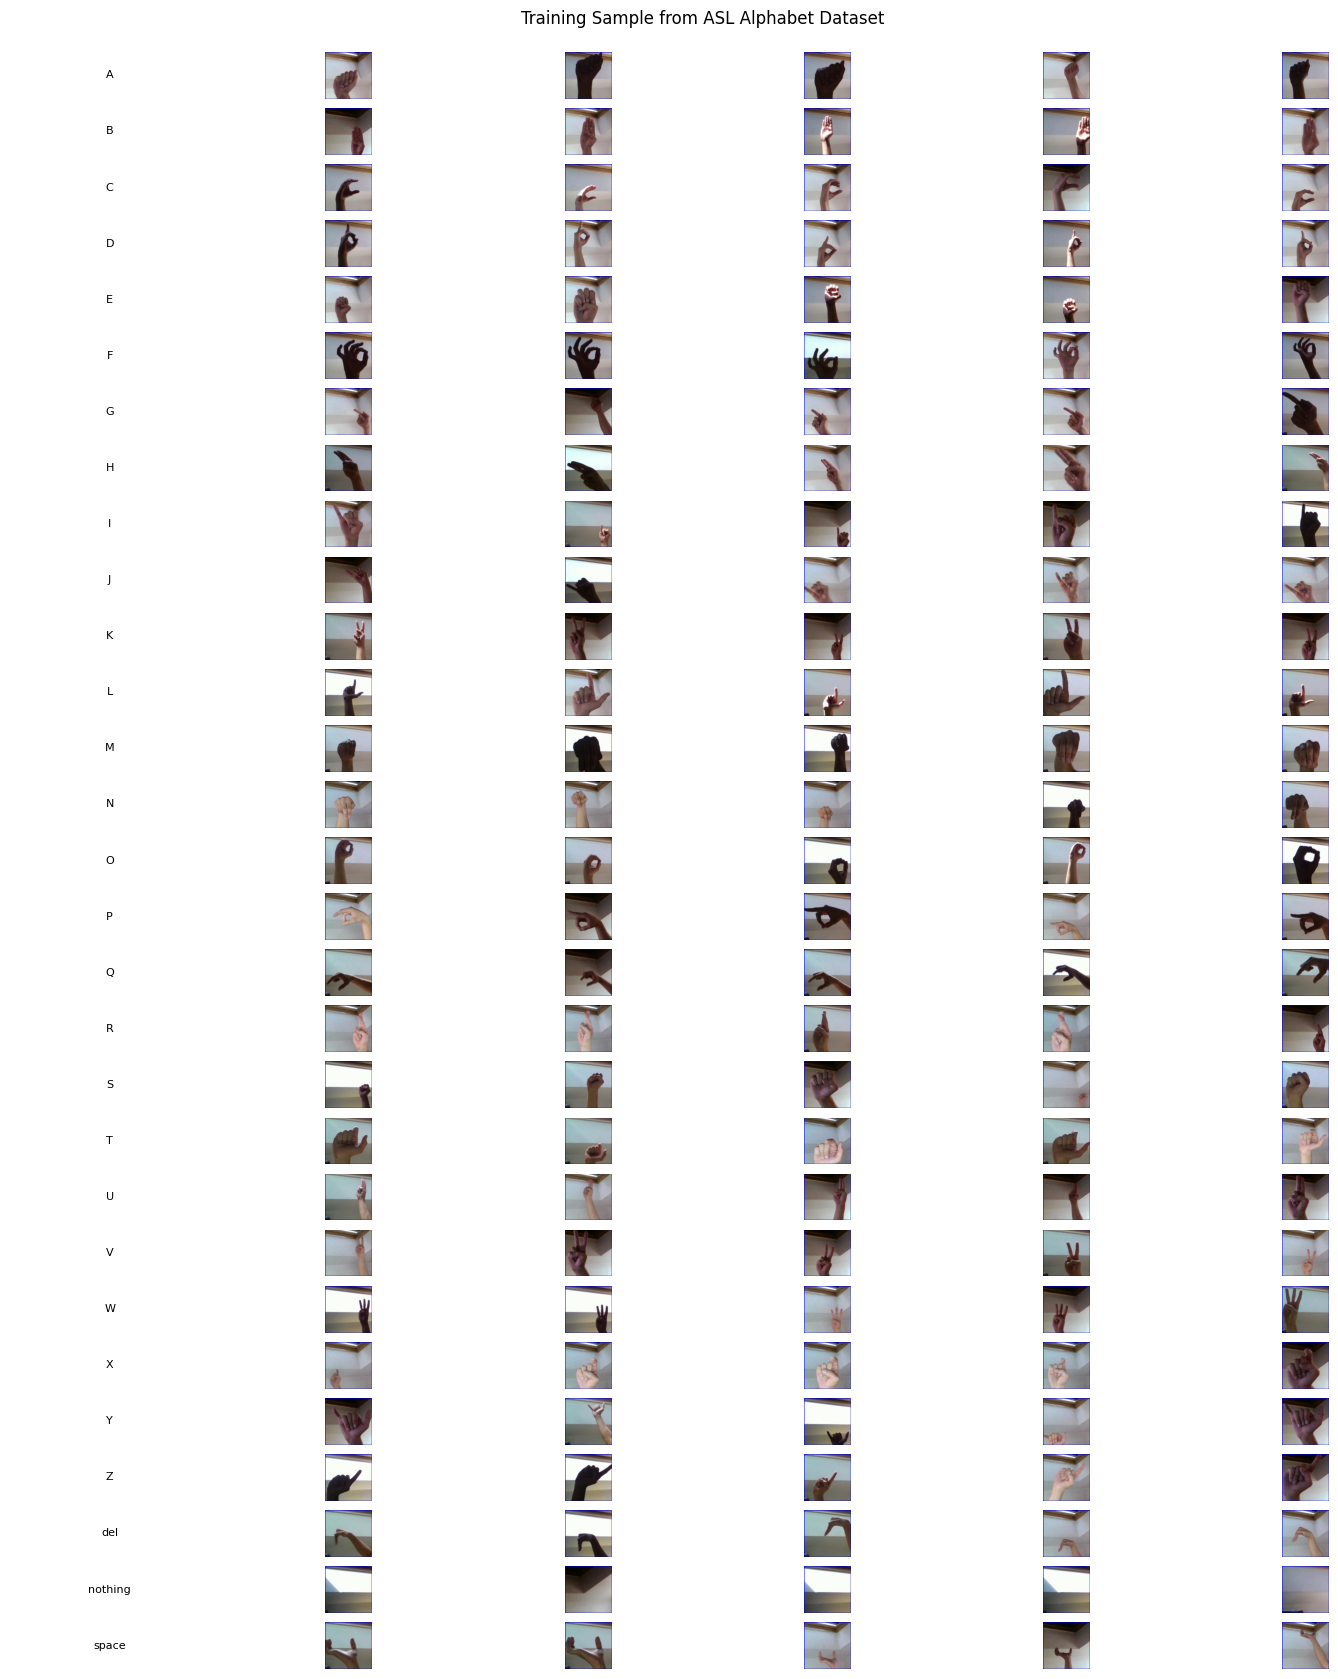

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2

fig, axs = plt.subplots(len(chars), 6, figsize=(18, 21))

for i, char in enumerate(chars):
  axs[i, 0].text(0.5, 0.5, char, ha = 'center', va = 'center', fontsize = 8)
  axs[i, 0].axis('off')

  charFolder_path = os.path.join(data_path, char)
  img_list = os.listdir(charFolder_path)

  for j in range(5):
    img_path = os.path.join(charFolder_path, img_list[j])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i, j+1].imshow(img)
    axs[i, j+1].axis("off")

plt.suptitle("Training Sample from ASL Alphabet Dataset", x = 0.51, y= 0.9)
plt.show()

In [6]:
import glob

img_paths = []
char_labels = []

for char in chars:
    label_path = os.path.join(data_path, char, "*") # Create a path pattern to match all files in the directory named after the character

    image_files = glob.glob(label_path) # Find all files that match the pattern

    sign_label = [char] * len(image_files) # List of labels, one for each image file

    # Extend the img_paths and char_labels lists with the new files and labels
    img_paths.extend(image_files)
    char_labels.extend(sign_label)

# Create a pandas dataframe with a column for character labels and for image paths
asl_df = pd.DataFrame({"char_label": char_labels, "image_path": img_paths})

asl_df

,char_label,image_path
0,A,/content/asl_alphabet_train/asl_alphabet_train...
1,A,/content/asl_alphabet_train/asl_alphabet_train...
2,A,/content/asl_alphabet_train/asl_alphabet_train...
3,A,/content/asl_alphabet_train/asl_alphabet_train...
4,A,/content/asl_alphabet_train/asl_alphabet_train...
...,...,...
86995,space,/content/asl_alphabet_train/asl_alphabet_train...
86996,space,/content/asl_alphabet_train/asl_alphabet_train...
86997,space,/content/asl_alphabet_train/asl_alphabet_train...
86998,space,/content/asl_alphabet_train/asl_alphabet_train...


In [7]:
asl_image_paths = np.array(asl_df['image_path']) #create a numpy array that containts the paths for each image
print(asl_image_paths)
asl_image_paths.shape

asl_char_labels = np.array(asl_df['char_label']) #create another numpy array that contains the labels of each image that corresponds with the paths from the pervious code block
print(asl_char_labels)
asl_char_labels.shape

['/content/asl_alphabet_train/asl_alphabet_train/A/A1147.jpg'
 '/content/asl_alphabet_train/asl_alphabet_train/A/A168.jpg'
 '/content/asl_alphabet_train/asl_alphabet_train/A/A278.jpg' ...
 '/content/asl_alphabet_train/asl_alphabet_train/space/space669.jpg'
 '/content/asl_alphabet_train/asl_alphabet_train/space/space2746.jpg'
 '/content/asl_alphabet_train/asl_alphabet_train/space/space828.jpg']
['A' 'A' 'A' ... 'space' 'space' 'space']


(87000,)

In [8]:
asl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87000 entries, 0 to 86999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   char_label  87000 non-null  object
 1   image_path  87000 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


# **Split Data**

In [9]:
from sklearn.model_selection import train_test_split

# First split: 70% training, 30% for validation and test
X_train, X_temp, Y_train, Y_temp = train_test_split(asl_image_paths, asl_char_labels, test_size=0.3, random_state=42)

# Second split: Divide the 30% into validation and test sets (15% each)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Check shapes
print(X_train.shape), print(Y_train.shape) #70%
print(X_valid.shape), print(Y_valid.shape) #15%
print(X_test.shape), print(Y_test.shape); #15%

(60900,)
(60900,)
(13050,)
(13050,)
(13050,)
(13050,)


# **Setting Up Image Data Generator on Training Data and Validation Data**

In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255.)
# Convert one-hot encoded labels to a list of strings
Y_train_int_labels = [chars.index(label) for label in Y_train]
Y_train_str_labels = [str(label) for label in Y_train_int_labels]

# Modify the train_df data frame
train_df = pd.DataFrame({'x': X_train, 'y': Y_train_str_labels})

batch_size= 16

# Define the ImageDataGenerator for training
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="x",
    y_col="y",
    class_mode="categorical",  # Set class_mode to "categorical"
    target_size=(200, 200),
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb"
)


Found 60900 validated image filenames belonging to 29 classes.


In [11]:
val_datagen = ImageDataGenerator(rescale=1./255.)

Y_valid_int_labels = [chars.index(label) for label in Y_valid]
Y_valid_str_labels = [str(label) for label in Y_valid_int_labels]

valid_df = pd.DataFrame({'x': X_valid, 'y': Y_valid_str_labels})

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col="x",
    y_col="y",
    class_mode="categorical",
    target_size=(200, 200),
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb"
)

Found 13050 validated image filenames belonging to 29 classes.


# **Building a VGG16 Model**

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

None

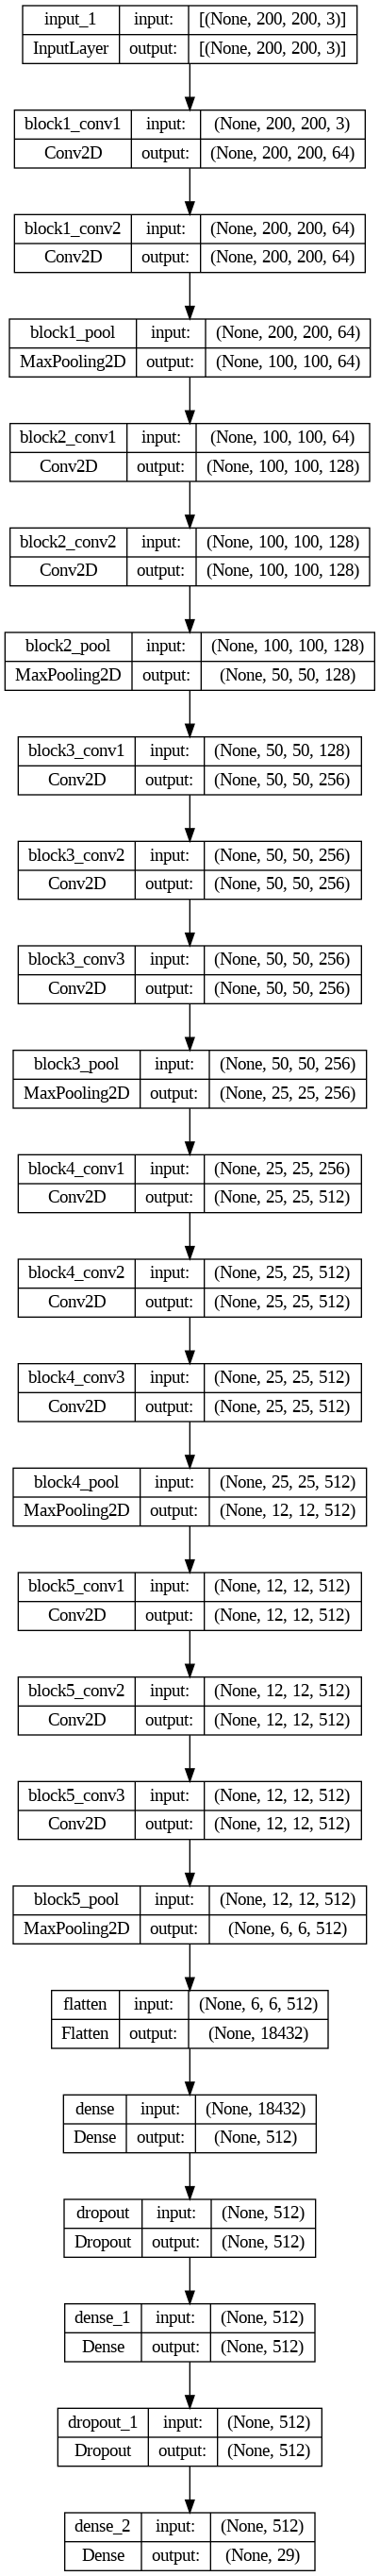

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import Input
import tensorflow as tf

# Load VGG16 model and modify for ASL recognition
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)

vgg16_model = Model(inputs=base_model.input, outputs=predictions)

display(vgg16_model.summary())
display(tf.keras.utils.plot_model(vgg16_model, to_file='vgg16.png', show_shapes=True))

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
# Compile and train the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('asl_vgg16_best_weights.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# **Train Model**

In [14]:
# Train the Model
history = vgg16_model.fit(
    train_generator,
    steps_per_epoch= len(X_train) // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps= len(X_valid) // batch_size,
    callbacks=[checkpoint]
)

Epoch 1/20
3806/3806 [==============================] - ETA: 0s - loss: 1.2857 - accuracy: 0.6162

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3806/3806 [==============================] - 110s 26ms/step - loss: 1.2857 - accuracy: 0.6162 - val_loss: 0.1735 - val_accuracy: 0.9676
Epoch 2/20
3806/3806 [==============================] - 98s 26ms/step - loss: 0.3027 - accuracy: 0.9044 - val_loss: 0.0498 - val_accuracy: 0.9906
Epoch 3/20
3806/3806 [==============================] - 97s 26ms/step - loss: 0.1689 - accuracy: 0.9451 - val_loss: 0.0411 - val_accuracy: 0.9892
Epoch 4/20
3806/3806 [==============================] - 97s 25ms/step - loss: 0.1211 - accuracy: 0.9606 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 5/20
3806/3806 [==============================] - 97s 26ms/step - loss: 0.1002 - accuracy: 0.9667 - val_loss: 0.0140 - val_accuracy: 0.9965
Epoch 6/20
3806/3806 [==============================] - 97s 26ms/step - loss: 0.0857 - accuracy: 0.9712 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 7/20
3806/3806 [==============================] - 98s 26ms/step - loss: 0.0733 - accuracy: 0.9752 - val_loss: 0.0079 - val_accur

# **Plot Loss for Training and Validation**

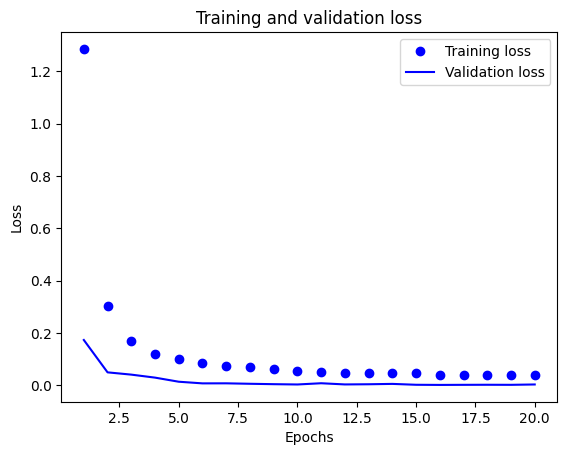

In [15]:
# Extract accuracy and loss values for both training and validation sets from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epoch numbers, starting from 1 to the number of epochs trained
epochs = range(1, len(acc) + 1)

# Plotting Training vs. Validation Loss
plt.plot(epochs, loss, 'bo', label='Training loss')  # 'bo' (blue dot) for training loss per epoch
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # 'b' (solid blue line) for validation loss per epoch
plt.title('Training and validation loss')
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()

plt.show()

# **Plot Accuracies for Training and Validation**

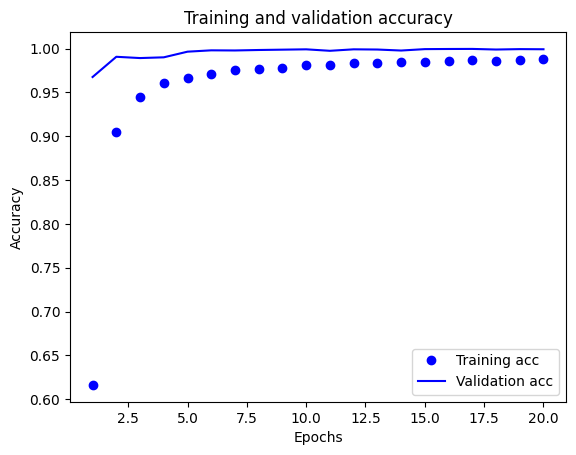

In [16]:
plt.clf() #clear figure to create a new plot

# Plotting Training vs. Validation Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')  # 'bo' (blue dot) for training accuracy per epoch
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # 'b' (solid blue line) for validation accuracy per epoch
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()

plt.show()

# **Confusion Matrix**

816/816 [==============================] - 16s 19ms/step


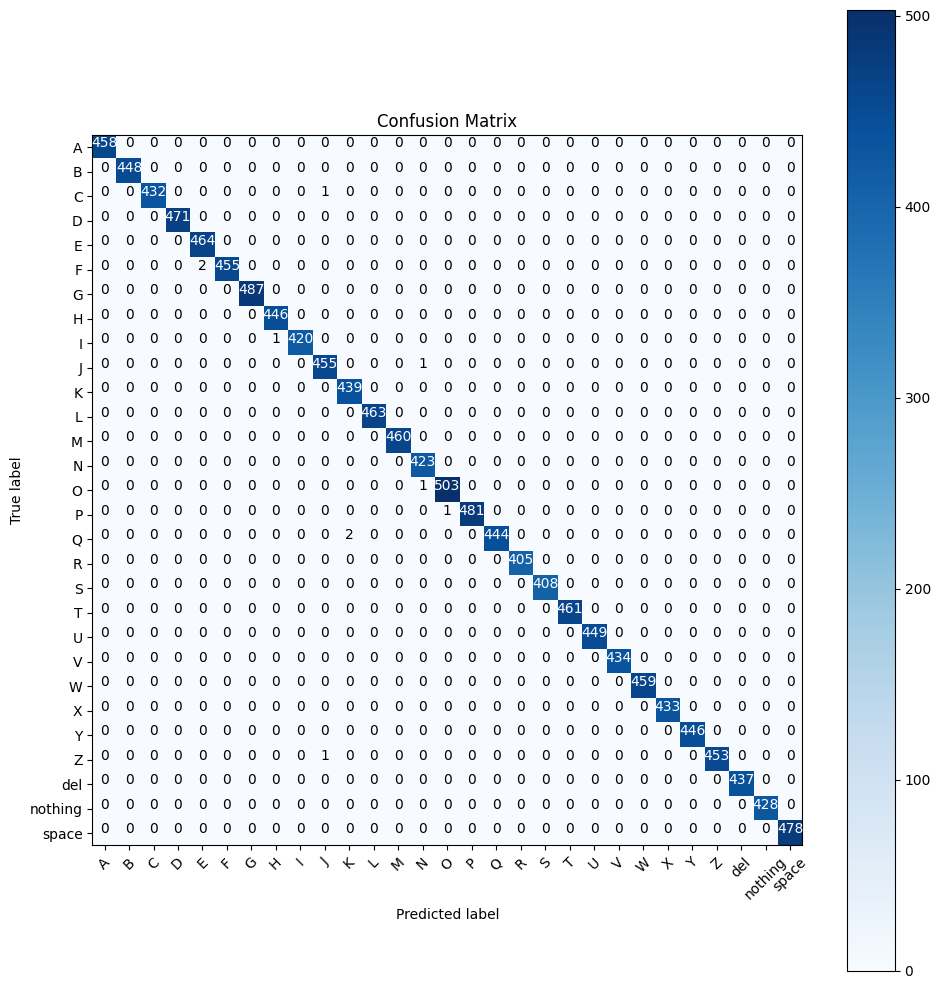

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import itertools

y_pred = vgg16_model.predict(validation_generator) # use the trained model to make predictions on the validation dataset

y_pred_labels = np.argmax(y_pred, axis=1) # convert the predicted probabilities to class labels

y_true_labels = validation_generator.labels # extract true labels from the validation data generator

cm = confusion_matrix(y_true_labels, y_pred_labels) # create a confusion matrix to compare the true labels and predicted labels

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    int_to_char = {i: char for i, char in enumerate(chars)} # create a mapping from integer labels to the original character labels

    # Set up the axes with the character labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, [int_to_char[i] for i in range(len(classes))], rotation=45)
    plt.yticks(tick_marks, [int_to_char[i] for i in range(len(classes))])

    # annotate the confusion matrix with the actual counts
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = [i for i in range(29)] # Adjust this as per your actual class names
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()

# **Recall Scores, Precision Score, F1 Score**

In [18]:
from sklearn.metrics import precision_score

precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
print(f'Precision: {precision}')

Precision: 0.9992362972608856


In [19]:
from sklearn.metrics import recall_score

recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
print(f'Recall: {recall}')

Recall: 0.9992337164750957


In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.9992338928263663


# **Testing Model**

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255.)

Y_test_int_labels = [str(chars.index(label)) for label in Y_test] #convert the character labels into their corresponding index positions within the chars list, this is necessary for categorical cross_entropy
test_df = pd.DataFrame({'x': X_test, 'y': Y_test_int_labels})

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="x",
    y_col="y",
    class_mode="categorical",
    target_size=(200, 200),
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb"
)


test_loss, test_acc = vgg16_model.evaluate(test_generator, steps=len(X_test) // batch_size)
print('Test Accuracy:', test_acc)

Found 13050 validated image filenames belonging to 29 classes.
815/815 [==============================] - 17s 21ms/step - loss: 0.0033 - accuracy: 0.9990
Test Accuracy: 0.9990030527114868
